<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Radiance-and-reflectance" data-toc-modified-id="Radiance-and-reflectance-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Radiance and reflectance</a></span></li></ul></div>

# Radiance and reflectance

In [1]:
import a301
from pathlib import Path
#import rasterio
from IPython.display import Image
from a301.landsat.landsat_metadata import landsat_metadata
from a301.landsat.toa_radiance import toa_radiance_8, toa_radiance_457
from a301.landsat.toa_reflectance import toa_reflectance_8, toa_reflectance_457
from PIL import Image as pil_image
from PIL.TiffTags import TAGS
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, img_as_float
from skimage import exposure
import pdb

may_2017= a301.data_dir / Path('landsat8')
# may_2015=a301.test_dir / Path("landsat_2018_05_13")
# data_dir=may_2015
# data_dir=june_2015
tiff_file=list(may_2017.glob("*B1.TIF"))[0]
meta_file=list(may_2017.glob("*MTL.txt"))[0]
meta_data=landsat_metadata(meta_file)
rad_dict={'LANDSAT_7':toa_radiance_457,'LANDSAT_8':toa_radiance_8}
refl_dict={'LANDSAT_7':toa_reflectance_457,'LANDSAT_8':toa_reflectance_8}         
satellite=meta_data.SPACECRAFT_ID
rad_fun=rad_dict[satellite]
refl_fun=refl_dict[satellite]

Scene LC81900312017148LGN00 center time is 2017-05-28 09:46:46


Scene LC81900312017148LGN00 center time is 2017-05-28 09:46:46
[1]


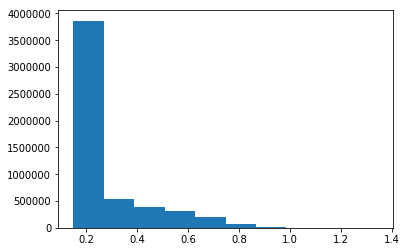

In [2]:
%matplotlib inline
np.seterr(divide='ignore',invalid='ignore')
refl=refl_fun([1],meta_file)
print(list(refl.keys()))
hit1 = ~np.isnan(refl[1])
hit2 = refl[1] > 1.5e-1
hit=np.logical_and(hit1,hit2)
plt.hist(refl[1][hit].ravel());

Scene LC81900312017148LGN00 center time is 2017-05-28 09:46:46
working on band 1


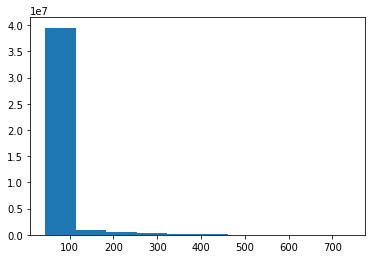

In [3]:
rad=rad_fun([1],meta_file)
hit1 = ~np.isnan(rad[1])
hit2 = rad[1] > 1.5e-1
hit=np.logical_and(hit1,hit2)
plt.hist(rad[1][hit].ravel());